## Proyecto 1 - Etapa 1. Construcción de modelos de analítica de textos  
##BONO: TOKENIZADOR Y MODELO DE EMBEDDINGS

Sofia Vasquez - 202123910
Isabella Caputi - 202122075
Mario Velasquez -

Objetivo:
* Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.



## I. Descripción general Fondo de Poblaciones de las Naciones Unidas.
El 25 de septiembre de 2015, la Organización de las Naciones Unidas (ONU) adoptó la Agenda 2030 para el Desarrollo Sostenible, con el objetivo de erradicar la pobreza, garantizar el acceso a la salud y la educación, promover la igualdad de género y reducir el impacto ambiental, entre otras metas. Para ello, se establecieron 17 Objetivos de Desarrollo Sostenible (ODS)1 y 169 metas asociadas. En este marco, diversas entidades, como el Fondo de Población de las Naciones Unidas (UNFPA)2, participan en el seguimiento y evaluación de políticas públicas, utilizando herramientas de participación ciudadana para identificar problemáticas y evaluar soluciones en función de los ODS. Uno de los mayores desafíos en este proceso es el análisis de información textual proveniente de distintas fuentes vinculadas a la planificación participativa territorial. Esta tarea demanda recursos significativos y expertos capaces de relacionar los contenidos con los ODS. Contar con este conocimiento permitiría tomar decisiones más informadas basadas en la opinión ciudadana, orientando las políticas públicas hacia el cumplimiento de la Agenda 2030. El UNFPA busca desarrollar un proyecto conjunto con ustedes, cuyo objetivo principal es vincular de forma automática las opiniones de la ciudadanía con los Objetivos de Desarrollo Sostenible (ODS) 1, 3 y 4. Para ello, se deberá aplicar una metodología de desarrollo de aplicaciones analíticas que permita crear un modelo capaz de analizar y clasificar dichas opiniones. Este modelo deberá integrarse en una aplicación web o móvil, desde la cual podrá ser utilizado y reentrenado continuamente a partir de textos en lenguaje natural.

### 1. Instalación e importanción de librerías.


Realizamos los mismos pasos que hicimos para los modelos anteriores, pero luego la tokenizacion la hacemos diferente

In [1]:
!pip install contractions

In [2]:
!pip install inflect
!pip install scikit-plot


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [3]:
!pip install --upgrade joblib loky
!pip install --upgrade transformers

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt


  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.8.1
    Uninstalling visions-0.8.1:
      Successfully uninstalled visions-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.


### 2. Perfilamiento y entendimiento de los datos



#### Realizamos la lectura de los datos.

In [8]:
data=pd.read_excel('/content/Datos_proyecto.xlsx')
data_t=data

In [9]:
data_t

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


Aca podemos ver los datos que tenemos para realizar el proyecto.

In [10]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


Queremos ver la informacion de los datos, en este caso podemos ver que tanto en la columna texto como labels no hay nulos y los tipos son object y int respectivamente. La variables textos es la que nos va a permitir predecir que label (cual ODN va a escoger).

#### Entendimiento de los Datos

Para entender los mensajes, se realizan 'estadísticas descriptivas' para poder obtener un análisis de los textos.



In [11]:
from scipy import stats as st

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['textos']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Media'] = [[np.mean([len(x) for x in i.split(' ')])][0] for i in textos['textos']]

In [12]:
textos

,textos,labels,Conteo,Max,Min,Media
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,14,1,6.354167
1,Para los niños más pequeños (bebés y niños peq...,4,516,16,1,6.180556
2,"Además, la formación de especialistas en medic...",3,659,15,1,6.096774
3,En los países de la OCDE se tiende a pasar de ...,4,693,18,1,5.366972
4,Este grupo se centró en las personas que padec...,3,608,14,0,5.410526
...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,16,1,5.566372
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,15,1,5.376471
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,12,1,4.515625
2422,"Sin embargo, estas fallas del mercado implican...",3,754,15,1,4.852713


En este bloque, generamos features descriptivas de los textos:

Conteo: tamaño total del texto (caracteres).

Max: longitud de la palabra más larga.

Min: longitud de la palabra más corta.

Media: promedio de longitudes de palabras.

Ahora, vamos a realizar un resporte de datos. Importamos Pandas Profiling para obtener un reporte de los datos

In [13]:
!pip install -U ydata-profiling

  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [14]:
import pandas as pd
from ydata_profiling import ProfileReport

In [15]:
ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00,  6.78it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

PONER ANALISIS

### 3. Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.



#### **3.1 Limpieza de los datos**
Para dejar el archivo en texto plano, sobre todo cuando vienen de diferentes fuentes como HTML, Twitter, XML, entre otros. También para eliminar caracteres especiales y pasar todo a minúscula.

<span style="color:red"> En este punto te invitamos a completar las funciones faltantes, como convertir los elementos de una lista a minúsculas (to_lowercase) y para eliminar los stowords (remove_stopwords) <span>




In [16]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
import re, unicodedata
import inflect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words("spanish"))
p = inflect.engine()

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, max_features=5000, ngram_range=(1,2)):
        self.max_features = max_features
        self.ngram_range = ngram_range
        self.vectorizer = TfidfVectorizer(max_features=self.max_features,
                                          ngram_range=self.ngram_range)

    def remove_stopwords(self, words):
        return [w for w in words if w not in stop_words]

    def to_lowercase(self, words):
        return [w.lower() for w in words if w is not None]

    def remove_punctuation(self, words):
        return [re.sub(r'[^\w\s]', '', w) for w in words if re.sub(r'[^\w\s]', '', w) != '']

    def remove_non_ascii(self, words):
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8','ignore')
            if new_word != "":
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def preprocessing(self, text):
        if text is None or str(text).strip() == "" or str(text).lower() == "nan":
            return ""

        words = word_tokenize(str(text))


        words = self.to_lowercase(words)
        words = self.remove_stopwords(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)

        return " ".join(words)

    def fit(self, X, y=None):
        cleaned = [self.preprocessing(text) for text in X]
        self.vectorizer = TfidfVectorizer(max_features=self.max_features,
                                          ngram_range=self.ngram_range)
        self.vectorizer.fit(cleaned)
        return self

    def transform(self, X, y=None):
        cleaned = [self.preprocessing(text) for text in X]
        return self.vectorizer.transform(cleaned)



#### **3.2 Encoder BERT**


In [18]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch
import numpy as np

#importamos el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

#Remapeamos las etiquetas a 0,1,2 para que sea mas comprensible
map_dict = {1: 0, 3: 1, 4: 2}
data_t["labels_mapped"] = data_t["labels"].map(map_dict)

#Eliminamos las filas con vacios
data_t = data_t.dropna(subset=["labels_mapped"]).copy()
data_t["labels_mapped"] = data_t["labels_mapped"].astype(int)

# Dataset del DataFrame limpio
dataset = Dataset.from_pandas(data_t[['textos','labels_mapped']])
dataset = dataset.rename_column("labels_mapped", "labels")

#Tokenización
def tokenize(batch):
    return tokenizer(batch['textos'], padding="max_length", truncation=True, max_length=128)

dataset = dataset.map(tokenize, batched=True)

#formato para pytorch
dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

#División en train/test
dataset = dataset.train_test_split(test_size=0.3, seed=42)
train_dataset = dataset['train']
test_dataset = dataset['test']

#Modelo BERT para la clasificación de las 3 clases
model = BertForSequenceClassification.from_pretrained(
    "dccuchile/bert-base-spanish-wwm-cased",
    num_labels=3
)

#luego configuramos el entrenamiento
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    do_eval=True,
    report_to="none"
)

#por ultimo, entrenamos el modelo con ayuda de Hugging Face y utilizamos el set de train seleccionado anteriormente
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

#Por ultimo entrenamos el modelo
trainer.train()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/2424 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


TrainOutput(global_step=318, training_loss=0.08482568368971723, metrics={'train_runtime': 124.6126, 'train_samples_per_second': 40.831, 'train_steps_per_second': 2.552, 'total_flos': 334680267350016.0, 'train_loss': 0.08482568368971723, 'epoch': 3.0})

Reporte de clasificación BERT:

              precision    recall  f1-score   support

       ODS 1       0.96      0.97      0.96       151
       ODS 3       0.99      0.99      0.99       276
       ODS 4       0.99      0.99      0.99       301

    accuracy                           0.98       728
   macro avg       0.98      0.98      0.98       728
weighted avg       0.98      0.98      0.98       728



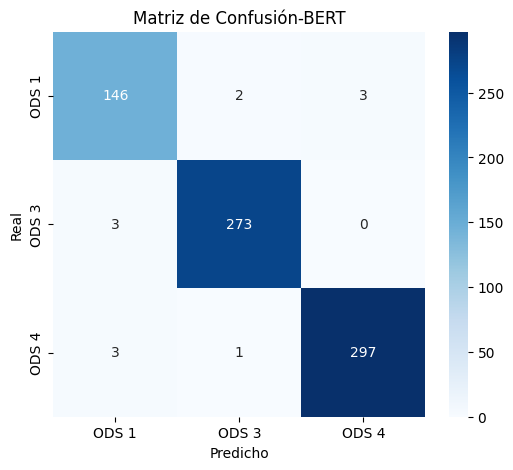

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#despues de obtener el modelo, realizamos las predicciones sobre el conjunto de test
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

#volvemos a remapear a las etiquetas originales de los ODS 1,3 y 4.
inv_map = {0: 1, 1: 3, 2: 4}
y_pred_labels = [inv_map[i] for i in y_pred]
y_true_labels = [inv_map[i] for i in y_true]

#Obtenemos el reporte de clasificacion
print("Reporte de clasificación BERT:\n")
print(classification_report(y_true_labels, y_pred_labels, target_names=["ODS 1","ODS 3","ODS 4"]))

#Matriz de confusión
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=[1,3,4])

#realizamos el mapa de calor para los resultados y poder comparar tambien con los otros modelos
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["ODS 1","ODS 3","ODS 4"], yticklabels=["ODS 1","ODS 3","ODS 4"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión-BERT")
plt.show()
